In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the datasets
df = pd.read_csv('../datasets/all_trips.csv')
descriptive = pd.read_csv('../small_datasets/descriptive_rides.csv')
rebalanced_2 = pd.read_csv('../small_datasets/rebalanced0.2.csv')
rebalanced_4 = pd.read_csv('../small_datasets/rebalanced0.4.csv')
rebalanced_6 = pd.read_csv('../small_datasets/rebalanced0.6.csv')
rebalanced_8 = pd.read_csv('../small_datasets/rebalanced0.8.csv')
rebalanced_100 = pd.read_csv('../small_datasets/rebalanced100.csv')



## Plot departures per interval in one day

#### From original df

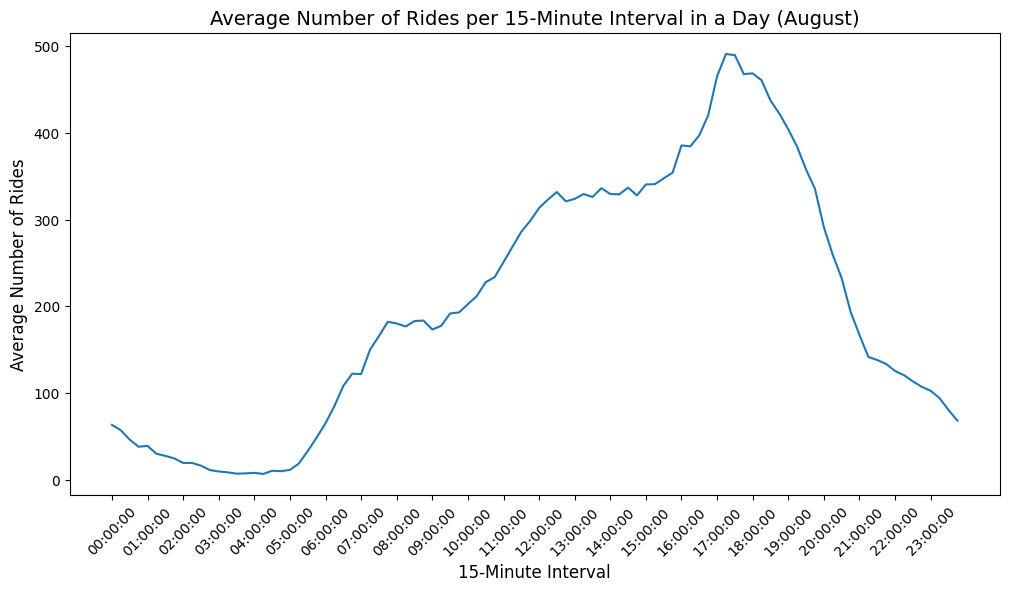

In [15]:
# Create 15-minute intervals
df['started_at'] = pd.to_datetime(df['started_at'])
df['date'] = df['started_at'].dt.date
df['15_min_interval'] = df['started_at'].dt.floor('15min')
df['15_min_interval'] = df['15_min_interval'].dt.time

# stay only with date and 15_min_interval columns
df = df[['date', '15_min_interval']]

#df.head()

# Convert 'date' to datetime and ensure '15_min_interval' is a time object
df['date'] = pd.to_datetime(df['date'])
df['15_min_interval'] = pd.to_datetime(df['15_min_interval'], format='%H:%M:%S').dt.time

# Group by '15_min_interval' and count rides per interval
rides_per_interval = df.groupby(['15_min_interval']).size().reset_index(name='num_rides')

# Add a 'day' column to count the number of unique days
unique_days = df['date'].nunique()

# Calculate the mean number of rides per interval
rides_per_interval['mean_rides'] = rides_per_interval['num_rides'] / unique_days

# Plot the mean number of rides per interval
plt.figure(figsize=(12, 6))
plt.plot(rides_per_interval['15_min_interval'].astype(str), rides_per_interval['mean_rides'])

# Add plot labels and titles
plt.xlabel('15-Minute Interval', fontsize=12)
plt.ylabel('Average Number of Rides', fontsize=12)
plt.title('Average Number of Rides per 15-Minute Interval in a Day (August)', fontsize=14)


# Show only some of the x-axis intervals
intervals_to_show = rides_per_interval['15_min_interval'].astype(str)[::4]  # Show every 4th interval
plt.xticks(ticks=np.arange(0, len(rides_per_interval), 4), labels=intervals_to_show, rotation=45)

# Show the plot
plt.show()

#### From our predictions

In [16]:
def generate_one_day_departures_plot(df):

    df = df[['15_min_interval']]
    df['15_min_interval'] = pd.to_datetime(df['15_min_interval'], format='%H:%M:%S').dt.time

    # Group by '15_min_interval' and count rides per interval
    rides_per_interval = df.groupby(['15_min_interval']).size().reset_index(name='num_rides')

    # Plot the mean number of rides per interval
    plt.figure(figsize=(12, 6))
    plt.plot(rides_per_interval['15_min_interval'].astype(str), rides_per_interval['num_rides'])

    # Add plot labels and titles
    plt.xlabel('15-Minute Interval', fontsize=12)
    plt.ylabel('Average Number of Rides', fontsize=12)
    plt.title('Predicted average Number of Rides per 15-Minute Interval in a Day (August)', fontsize=14)


    # Show only some of the x-axis intervals
    intervals_to_show = rides_per_interval['15_min_interval'].astype(str)[::4]  # Show every 4th interval
    plt.xticks(ticks=np.arange(0, len(rides_per_interval), 4), labels=intervals_to_show, rotation=45)

    # Show the plot
    plt.show()

C:\Users\barba\AppData\Local\Temp\ipykernel_85128\634477419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['15_min_interval'] = pd.to_datetime(df['15_min_interval'], format='%H:%M:%S').dt.time


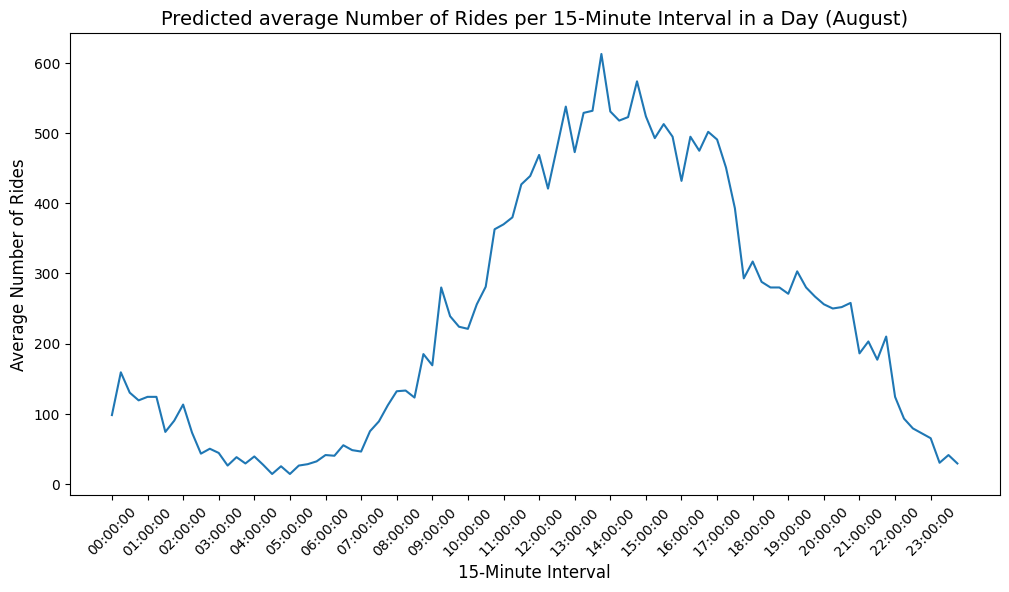

In [17]:
generate_one_day_departures_plot(descriptive)

In [18]:
# doesnt make sense to plot cause the plots will be equal

#generate_one_day_plot(rebalanced_2)
#generate_one_day_plot(rebalanced_4)
#generate_one_day_plot(rebalanced_6)
#generate_one_day_plot(rebalanced_8)
#generate_one_day_plot(rebalanced_100)

## Plot the impact of User Acceptance Levels on Availability Rate

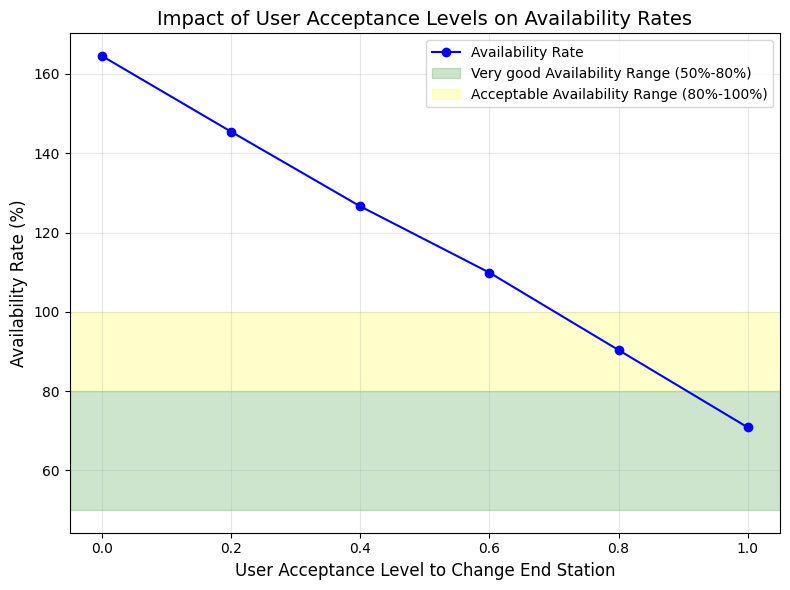

In [24]:
import matplotlib.pyplot as plt

# Data - prints of insights are in images folder
availability_rates = [188.13, 168.18, 142.41, 124.20, 101.67, 100.38]
availability_rates_2 = [164.52, 145.42, 126.60, 109.88, 90.35, 70.85]

acceptance_levels = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(acceptance_levels, availability_rates_2, marker='o', linestyle='-', color='blue', label="Availability Rate")
plt.axhspan(50, 80, color='green', alpha=0.2, label="Very good Availability Range (50%-80%)")
plt.axhspan(80, 100, color='yellow', alpha=0.2, label="Acceptable Availability Range (80%-100%)")


# Labels and Title
plt.title("Impact of User Acceptance Levels on Availability Rates", fontsize=14)
plt.xlabel("User Acceptance Level to Change End Station", fontsize=12)
plt.ylabel("Availability Rate (%)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show Plot
plt.show()


## Other relevant plots

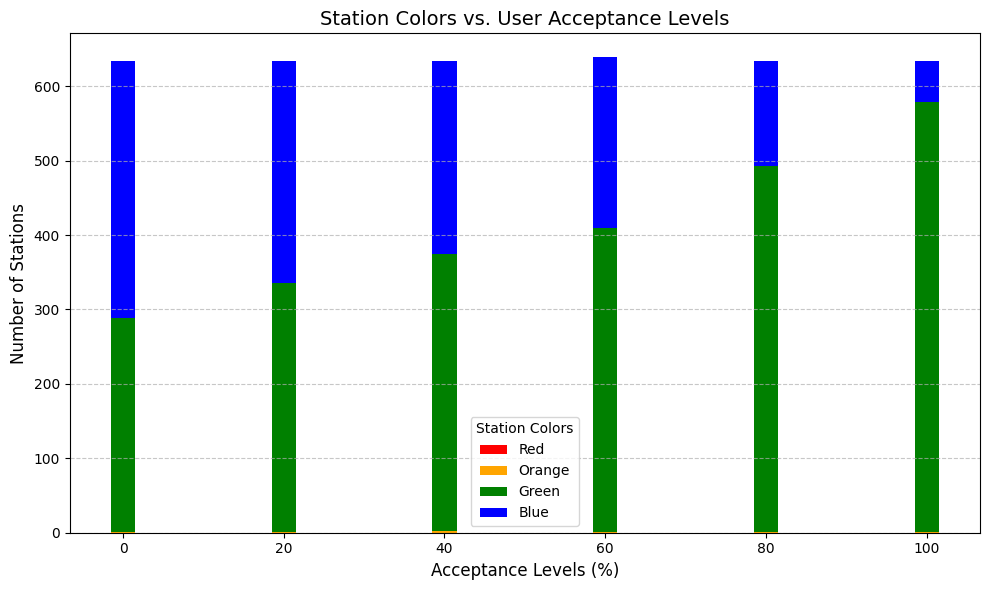

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
acceptance_levels = [0, 20, 40, 60, 80, 100]  # in percentage
red = [0, 0, 0, 0, 0, 0]
orange = [1, 1, 2, 1, 1, 1]
green = [288, 334, 373, 409, 492, 578]
blue = [345, 299, 259, 229, 141, 55]

# Plot settings
plt.figure(figsize=(10, 6))
width = 3  # width for each bar group

# Stacked bar plot
plt.bar(acceptance_levels, red, color='red', label='Red', width=width, bottom=np.zeros_like(red))
plt.bar(acceptance_levels, orange, color='orange', label='Orange', width=width, bottom=np.array(red))
plt.bar(acceptance_levels, green, color='green', label='Green', width=width, bottom=np.array(red) + np.array(orange))
plt.bar(acceptance_levels, blue, color='blue', label='Blue', width=width,
        bottom=np.array(red) + np.array(orange) + np.array(green))

# Labels and legend
plt.xlabel('Acceptance Levels (%)', fontsize=12)
plt.ylabel('Number of Stations', fontsize=12)
plt.title('Station Colors vs. User Acceptance Levels', fontsize=14)
plt.xticks(acceptance_levels)
plt.legend(title='Station Colors')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
